In [1]:
%load_ext autoreload
%autoreload 2

from computage.deage.kdm import KlemeraDoubalEstimator
from computage.deage.pls import PLS1
from computage.utils.data_utils import test_dataset
from computage.utils.metric_utils import print_metrics
from computage.analyzer.timecourse import linear_time_analysis
import pickle
from biolearn.model_gallery import ModelGallery

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
gallery = ModelGallery()
list(gallery.model_definitions.keys())
k1 = 'HRSInCHPhenoAge'
k2 = 'PhenoAge'

indices = gallery.get(k1).clock.coefficients.index

In [3]:
#hyper-train
train_data = pd.DataFrame()
train_meta = pd.DataFrame()


data, meta = pd.read_pickle('/tank/projects/computage/train/GSE40279.pkl.gz', compression='gzip').values()
# data, meta = pd.read_pickle('/tank/projects/computage/train/GSE132203.pkl.gz', compression='gzip').values()

In [4]:
stats = pd.read_csv('/tank/projects/computage/train/train_stats/GSE40279_corrstats.csv', index_col=0)

In [7]:
_data = pd.DataFrame({'r_abs':np.abs(stats['rvalue']), 
                      'r_res_abs':np.abs(stats['r_res']), 
                      'pheno':stats.index.isin(indices),
                      })


<Axes: xlabel='age', ylabel='cg09035930'>

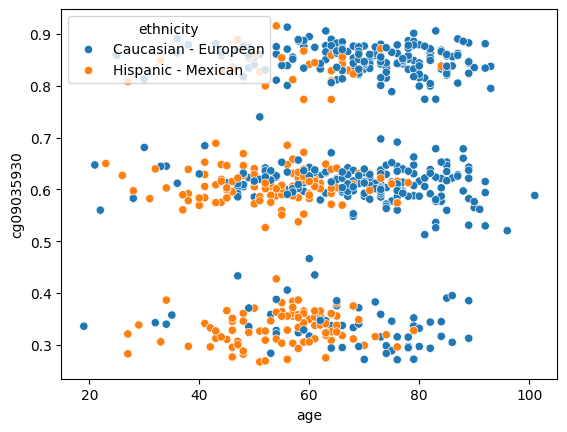

In [49]:
sns.scatterplot(x=meta['age'], y=data['cg09035930'], hue=meta['ethnicity'])

In [45]:
stats.loc[indices]['rse'].sort_values()

CpGmarker
cg00770871    0.002671
cg17414580    0.002994
cg16209630    0.003497
cg03970588    0.003731
cg04794120    0.004187
                ...   
cg09035930    0.185603
cg16744531    0.204931
cg06223162    0.216534
cg13077366    0.229496
cg04131969    0.314435
Name: rse, Length: 959, dtype: float64

<Axes: >

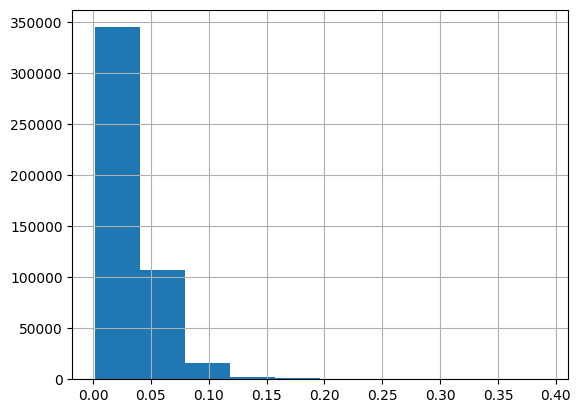

In [41]:
stats['rse'].hist()

In [38]:
stats.sort_values('r_res')

,slope,intercept,rvalue,p-value,stderr,rse,r2,s_res,i_res,r_res,p_res
id,,,,,,,,,,,
cg23556238,0.003138,0.585187,0.300316,3.862910e-15,0.000390,0.146992,0.090190,-0.003873,0.347613,-0.529114,1.330739e-48
cg11422312,0.002909,0.591980,0.287277,6.258603e-14,0.000379,0.143039,0.082528,-0.003718,0.330531,-0.502971,2.345663e-43
cg09651654,0.005226,0.488881,0.310976,3.559654e-16,0.000625,0.235537,0.096706,-0.005133,0.499299,-0.466971,7.757251e-37
cg07646083,0.003440,0.571996,0.249952,8.412544e-11,0.000521,0.196516,0.062476,-0.004219,0.412190,-0.458832,1.816157e-35
cg05526809,0.004262,0.491666,0.271115,1.624849e-12,0.000592,0.223147,0.073503,-0.004271,0.448073,-0.454380,9.837368e-35
...,...,...,...,...,...,...,...,...,...,...,...
cg16204205,-0.000119,0.794138,-0.030713,4.322668e-01,0.000151,0.056932,0.000943,0.000957,-0.020068,0.359893,1.714384e-21
cg26128129,-0.002497,0.958852,-0.196029,4.184137e-07,0.000488,0.184210,0.038427,0.002737,-0.026383,0.373066,4.313464e-23
cg04457792,0.000462,0.288257,0.131762,7.167579e-04,0.000136,0.051210,0.017361,0.000902,-0.020756,0.376700,1.515267e-23


<Axes: xlabel='r_res_abs', ylabel='Density'>

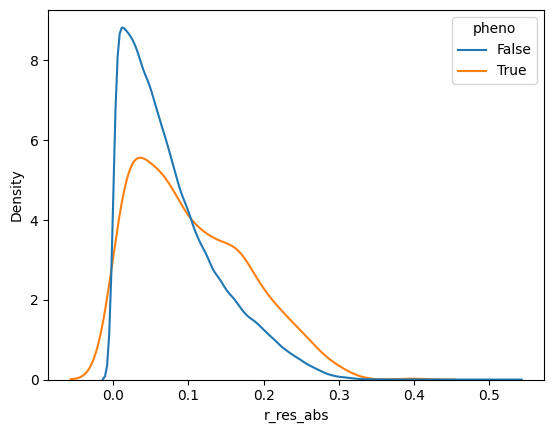

In [14]:
sns.kdeplot(data=_data, x='r_res_abs', hue='pheno', common_norm=False)

<Axes: xlabel='r_abs', ylabel='Density'>

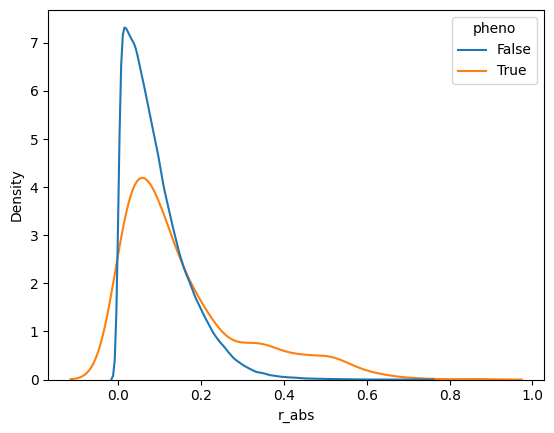

In [15]:
sns.kdeplot(data=_data, x='r_abs', hue='pheno', common_norm=False)

<Axes: xlabel='r_abs', ylabel='r_res_abs'>

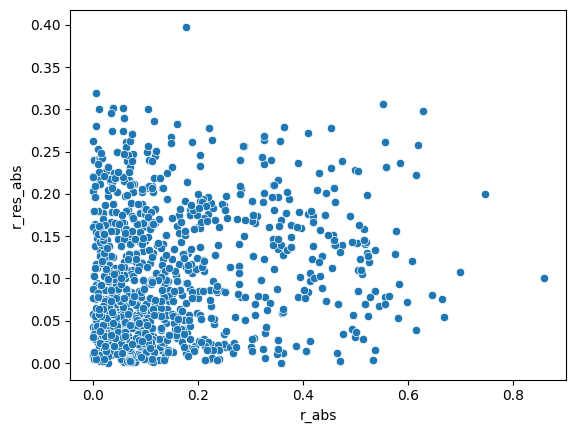

In [16]:
sns.scatterplot(data=_data[_data['pheno'] == True], x='r_abs', y='r_res_abs')

<Axes: >

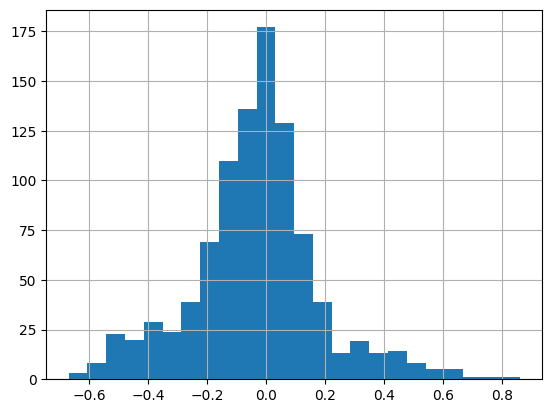

In [9]:
corrcoef = data[indices].corrwith(meta['age'])
corrcoef.hist(bins=24)

In [10]:
topsites = corrcoef.abs().sort_values(ascending=False)[:].index
y = meta['age']

In [11]:
stats = linear_time_analysis(data[topsites], y)

In [12]:
stats

,slope,intercept,rvalue,p-value,stderr,rse,r2,s_res,i_res,r_res,p_res
id,,,,,,,,,,,
cg16867657,4.641131e-03,0.372663,0.858536,6.916502e-192,0.000108,0.040879,7.370845e-01,0.000192,0.017438,0.100969,9.660326e-03
cg06639320,2.810822e-03,0.294148,0.747103,4.178307e-118,0.000098,0.036882,5.581623e-01,0.000344,0.004704,0.200072,2.380224e-07
cg07553761,3.333595e-03,0.091079,0.700060,1.000920e-97,0.000133,0.050149,4.900833e-01,0.000243,0.022014,0.108054,5.599286e-03
cg08234504,-1.508753e-03,0.377460,-0.668585,3.449214e-86,0.000066,0.024749,4.470055e-01,0.000060,0.014799,0.054118,1.662189e-01
cg04875128,4.099566e-03,0.034626,0.665003,5.774728e-85,0.000180,0.067901,4.422286e-01,-0.000220,0.066537,-0.075430,5.348088e-02
...,...,...,...,...,...,...,...,...,...,...,...
cg13123009,1.343503e-06,0.426309,0.000633,9.870979e-01,0.000083,0.031322,3.975022e-07,0.000083,0.017904,0.058451,1.347827e-01
cg17191567,2.468200e-06,0.690144,0.000424,9.913467e-01,0.000227,0.085799,1.770520e-07,0.000023,0.067479,0.006707,8.638585e-01
cg06500161,7.428541e-07,0.596503,0.000293,9.940212e-01,0.000099,0.037375,9.180664e-08,0.000071,0.023446,0.042013,2.826045e-01


In [85]:
#stats['fi'] = np.abs(stats['rvalue'])**2 / stats['rse']**2 * stats['r_res']**2
stats['fi'] = np.abs(stats['rvalue'])**2 * stats['r_res']**2

stats.sort_values('fi', ascending=False).head(7)

,slope,intercept,rvalue,p-value,stderr,rse,r2,s_res,i_res,r_res,p_res,fi
cg08097417,0.001528,0.020101,0.672365,1.064149e-105,0.000060,0.020717,0.452074,0.000371,-0.000053,0.336522,1.677767e-22,0.051196
cg21159778,0.002342,-0.018194,0.590940,6.343680e-76,0.000114,0.039348,0.349210,0.000664,0.001851,0.321558,1.478235e-20,0.036108
cg03032497,0.002732,0.041485,0.683129,2.358063e-110,0.000104,0.035984,0.466665,0.000404,0.008331,0.195639,2.677013e-08,0.017862
cg07955995,0.000847,0.005130,0.512719,4.154313e-54,0.000051,0.017457,0.262881,0.000235,0.003239,0.254016,4.391717e-13,0.016962
cg17243289,0.001418,0.049064,0.490645,2.168934e-49,0.000089,0.031031,0.240732,0.000391,0.006719,0.235035,1.935725e-11,0.013298
cg14911690,0.000661,-0.005704,0.469002,1.006285e-44,0.000044,0.015338,0.219963,0.000233,-0.000039,0.244259,2.904816e-12,0.013124
cg16832267,0.001416,0.008516,0.475860,3.632364e-46,0.000093,0.032237,0.226442,0.000447,0.003572,0.238596,9.395271e-12,0.012891


In [86]:
stats.loc['cg08097417']

slope         1.527508e-03
intercept     2.010069e-02
rvalue        6.723648e-01
p-value      1.064149e-105
stderr        5.971766e-05
rse           2.071652e-02
r2            4.520744e-01
s_res         3.707089e-04
i_res        -5.263701e-05
r_res         3.365219e-01
p_res         1.677767e-22
fi            5.119608e-02
Name: cg08097417, dtype: float64

(-0.35, 0.35)

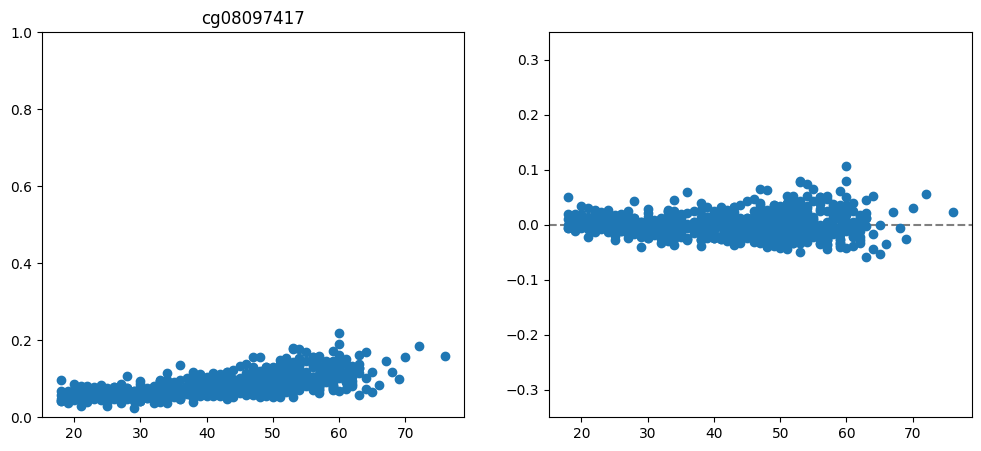

In [87]:
site = 'cg08097417'

fig, axes = plt.subplots(1, 2, figsize=(12,5))
resid = data[site] - stats.loc[site, 'slope'] * y - stats.loc[site, 'intercept']

axes[0].scatter(y, data[site])
axes[0].set_ylim([0, 1])
axes[0].set_title(site)
axes[1].axhline(0, color='grey', ls='--', zorder=0)
axes[1].scatter(y, resid)
axes[1].set_ylim([-0.35, 0.35])


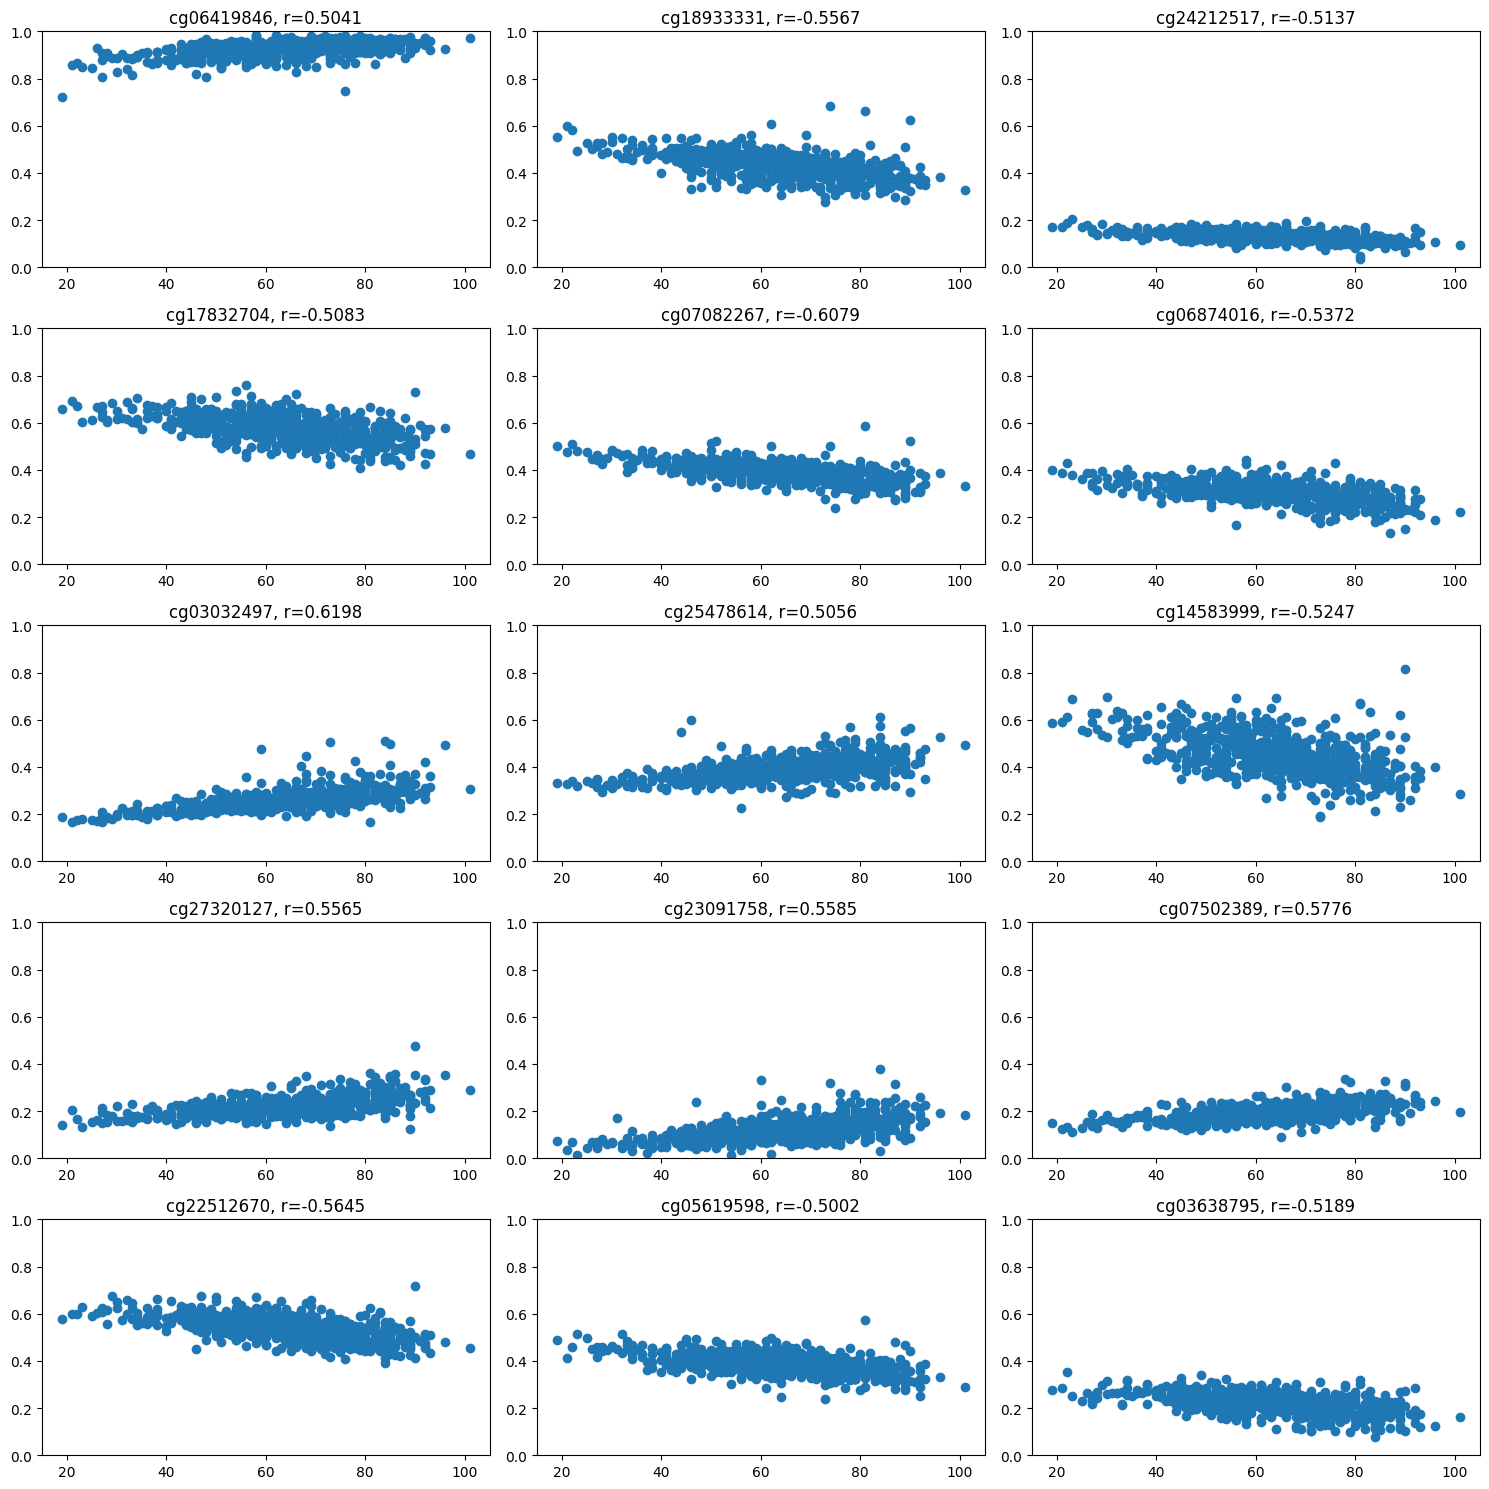

In [72]:
nsamples = 15

choice = np.random.choice(topsites, nsamples, replace=False)

fig, axs = plt.subplots(5, 3, figsize=(15, 15))
# Iterate over the columns and create a boxplot for each one
for i, col in enumerate(choice):
    ax = axs[i // 3, i % 3]
    ax.scatter(meta['age'], data[col])
    ax.set_ylim([0, 1])
    r = np.corrcoef(meta['age'], data[col])[0,1]
    ax.set_title(f'{col}, r={round(r, 4)}')
    # Adjust the layout and show the plot
plt.tight_layout()
plt.show()
